# Imports and Settings

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import numpy as np
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20.0, 5)

In [2]:
df = pd.read_csv('Yemane/flights_pred/data/flights_sample.csv', sep=';')
df['fl_date'] = pd.to_datetime(df['fl_date'], format='%Y-%m-%d')

# Structure of Notebook
1. Basic Data Introuction
2. Analyze columns with a lot of null values
3. Flight Distance Analysis
4. Departure Delay Temporal Analysis
5. Analysis of Categorical Variables of Interest
6. Final conlusions

# Basic Data Introduction

In [3]:
df.shape

(99996, 44)

In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'fl_date', 'mkt_unique_carrier',
       'branded_code_share', 'mkt_carrier', 'mkt_carrier_fl_num',
       'op_unique_carrier', 'tail_num', 'op_carrier_fl_num',
       'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id',
       'dest', 'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay',
       'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time',
       'arr_time', 'arr_delay', 'cancelled', 'cancellation_code', 'diverted',
       'dup', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'first_dep_time',
       'total_add_gtime', 'longest_add_gtime', 'no_name'],
      dtype='object')

In [5]:
df.isnull().sum().sort_values(ascending=False)

no_name                99996
longest_add_gtime      99255
total_add_gtime        99255
first_dep_time         99255
cancellation_code      98341
late_aircraft_delay    80979
security_delay         80979
nas_delay              80979
weather_delay          80979
carrier_delay          80979
air_time                1941
arr_delay               1934
actual_elapsed_time     1910
wheels_on               1728
taxi_in                 1728
arr_time                1697
taxi_out                1681
wheels_off              1681
dep_delay               1636
dep_time                1602
tail_num                 293
dest_city_name             0
mkt_carrier_fl_num         0
distance                   0
op_carrier_fl_num          0
op_unique_carrier          0
branded_code_share         0
mkt_carrier                0
origin_airport_id          0
mkt_unique_carrier         0
fl_date                    0
flights                    0
dup                        0
origin                     0
crs_elapsed_ti

In [6]:
df.dtypes

Unnamed: 0                      int64
Unnamed: 0.1                    int64
fl_date                datetime64[ns]
mkt_unique_carrier             object
branded_code_share             object
mkt_carrier                    object
mkt_carrier_fl_num              int64
op_unique_carrier              object
tail_num                       object
op_carrier_fl_num               int64
origin_airport_id               int64
origin                         object
origin_city_name               object
dest_airport_id                 int64
dest                           object
dest_city_name                 object
crs_dep_time                    int64
dep_time                      float64
dep_delay                     float64
taxi_out                      float64
wheels_off                    float64
wheels_on                     float64
taxi_in                       float64
crs_arr_time                    int64
arr_time                      float64
arr_delay                     float64
cancelled   

In [7]:
df.corr().arr_delay.sort_values(ascending=False)

arr_delay              1.000000
dep_delay              0.962480
carrier_delay          0.642402
late_aircraft_delay    0.506879
total_add_gtime        0.426005
longest_add_gtime      0.412344
weather_delay          0.285407
nas_delay              0.267831
taxi_out               0.216117
dep_time               0.132594
wheels_off             0.128429
taxi_in                0.101051
crs_dep_time           0.090741
first_dep_time         0.089602
crs_arr_time           0.079395
wheels_on              0.045611
actual_elapsed_time    0.041532
arr_time               0.038862
op_carrier_fl_num      0.024079
mkt_carrier_fl_num     0.023939
security_delay         0.010251
Unnamed: 0.1           0.003932
air_time               0.003149
dest_airport_id        0.000616
origin_airport_id     -0.004043
Unnamed: 0            -0.006313
crs_elapsed_time      -0.014743
distance              -0.015150
cancelled                   NaN
diverted                    NaN
flights                     NaN
no_name 

In [8]:
df.describe()

Unnamed: 0  Unnamed: 0.1  mkt_carrier_fl_num  op_carrier_fl_num  \
count  99996.000000  9.999600e+04        99996.000000       99996.000000   
mean   49997.500000  1.522734e+06         2732.534801        2732.451368   
std    28866.503096  1.069879e+06         1860.469076        1860.446034   
min        0.000000  3.000000e+00            1.000000           1.000000   
25%    24998.750000  5.732155e+05         1128.000000        1128.000000   
50%    49997.500000  1.374320e+06         2320.000000        2319.500000   
75%    74996.250000  2.372808e+06         4314.000000        4314.000000   
max    99995.000000  4.138848e+06         9390.000000        9390.000000   

       origin_airport_id  dest_airport_id  crs_dep_time      dep_time  \
count       99996.000000     99996.000000  99996.000000  98394.000000   
mean        12664.368985     12679.604564   1328.798232   1333.421387   
std          1519.775766      1524.891953    489.924048    503.737261   
min         10135.000000     10135.000000      1.000000      1.000000   
25%         11292.000000     11292.000000    915.000000    917.000000   
50%         12889.000000     12889.000000   1320.000000   1326.000000   
75%         14027.000000     14057.000000   1735.000000   1744.000000   
max         16218.000000     16869.000000   2359.000000   2400.000000   

          dep_delay      taxi_out  ...      distance  carrier_delay  \
count  98360.000000  98315.000000  ...  99996.000000   19017.000000   
mean      10.614284     17.505935  ...    767.561082      20.397960   
std       47.397440      9.864998  ...    586.165910      63.568281   
min     -118.000000      0.000000  ...     31.000000       0.000000   
25%       -6.000000     11.000000  ...    338.000000       0.000000   
50%       -2.000000     15.000000  ...    605.000000       0.000000   
75%        7.000000     21.000000  ...   1001.000000      18.000000   
max     1419.000000    171.000000  ...   5095.000000    1406.000000   

       weather_delay     nas_delay  security_delay  late_aircraft_delay  \
count   19017.000000  19017.000000    19017.000000         19017.000000   
mean        3.598412     15.763317        0.090077            27.545933   
std        29.055001     36.001861        2.596990            53.634856   
min         0.000000      0.000000        0.000000             0.000000   
25%         0.000000      0.000000        0.000000             0.000000   
50%         0.000000      3.000000        0.000000             3.000000   
75%         0.000000     19.000000        0.000000            34.000000   
max      1168.000000   1300.000000      198.000000          1192.000000   

       first_dep_time  total_add_gtime  longest_add_gtime  no_name  
count      741.000000       741.000000         741.000000      0.0  
mean      1339.333333        36.662618          35.931174      NaN  
std        509.963638        31.891701          30.822234      NaN  
min         23.000000         1.000000           1.000000      NaN  
25%        841.000000        15.000000          15.000000      NaN  
50%       1354.000000        28.000000          27.000000      NaN  
75%       1757.000000        45.000000          45.000000      NaN  
max       2358.000000       211.000000         179.000000      NaN  

[8 rows x 32 columns]

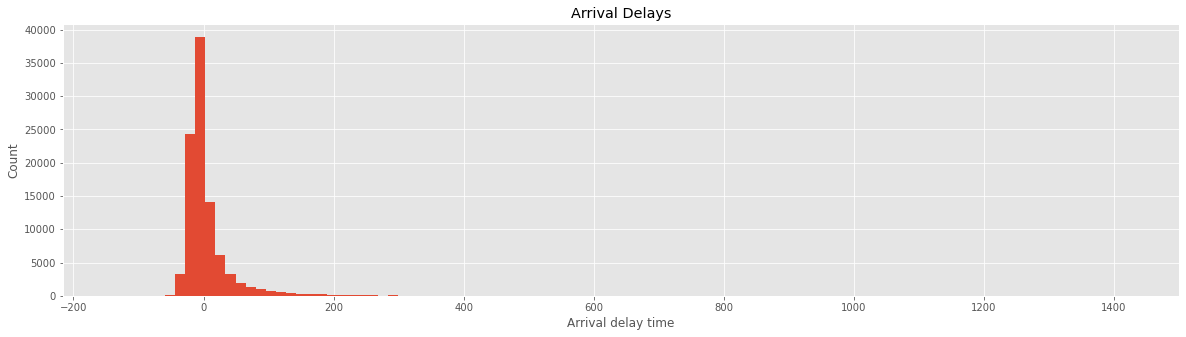

In [9]:
df['arr_delay'].hist(bins=100)
plt.title('Arrival Delays')
plt.xlabel('Arrival delay time')
plt.ylabel('Count');

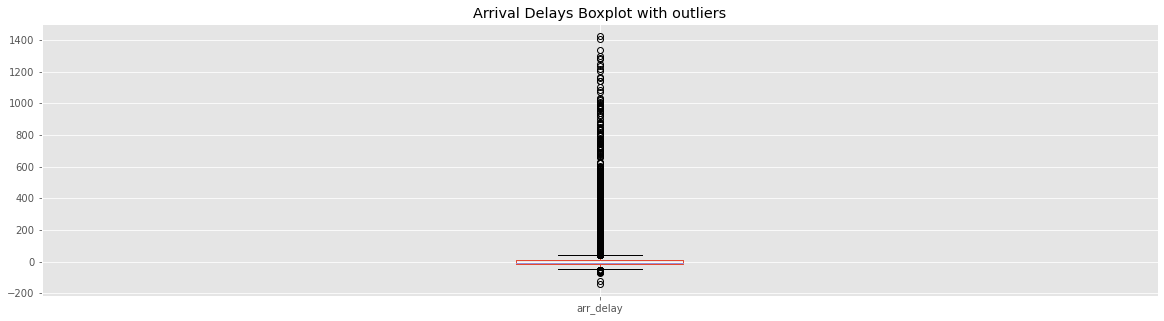

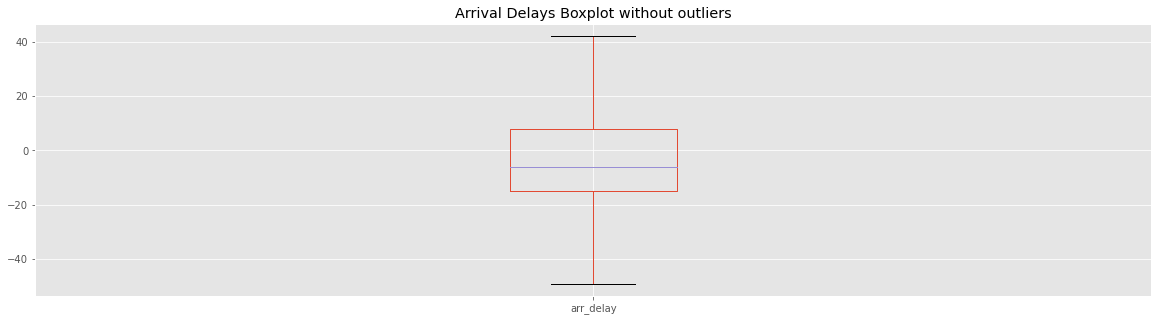

In [10]:
pd.DataFrame(df['arr_delay']).plot.box()
plt.title('Arrival Delays Boxplot with outliers')
pd.DataFrame(df['arr_delay']).plot.box(showfliers=False)
plt.title('Arrival Delays Boxplot without outliers');

---
# Analyze columns with a lot of null values

In [11]:
null_columns = df.columns[df.isnull().sum() > 70000]
null_columns = np.append(null_columns.values, np.array(['fl_date', 'arr_delay']))

In [12]:
df_null = df[null_columns].copy(deep=True)
df_null['month'] =  df_null.fl_date.dt.month
df_null['week'] = df_null.fl_date.dt.isocalendar().week
df_null['day'] = df_null.fl_date.dt.day_of_year
df_null['arr_delay'] = df_null['arr_delay'].fillna(0)
df_null['arr_delay_bool'] = df_null['arr_delay'] > 0
df_null

cancellation_code  carrier_delay  weather_delay  nas_delay  \
0                   NaN            6.0            0.0       10.0   
1                   NaN            NaN            NaN        NaN   
2                   NaN            NaN            NaN        NaN   
3                   NaN            NaN            NaN        NaN   
4                   NaN            NaN            NaN        NaN   
...                 ...            ...            ...        ...   
99991                 B            NaN            NaN        NaN   
99992               NaN           15.0            0.0        0.0   
99993               NaN            0.0            0.0       24.0   
99994               NaN            NaN            NaN        NaN   
99995               NaN            NaN            NaN        NaN   

       security_delay  late_aircraft_delay  first_dep_time  total_add_gtime  \
0                 0.0                  6.0             NaN              NaN   
1                 NaN                  NaN             NaN              NaN   
2                 NaN                  NaN             NaN              NaN   
3                 NaN                  NaN             NaN              NaN   
4                 NaN                  NaN             NaN              NaN   
...               ...                  ...             ...              ...   
99991             NaN                  NaN             NaN              NaN   
99992             0.0                 56.0             NaN              NaN   
99993             0.0                 32.0             NaN              NaN   
99994             NaN                  NaN             NaN              NaN   
99995             NaN                  NaN             NaN              NaN   

       longest_add_gtime  no_name    fl_date  arr_delay  month  week  day  \
0                    NaN      NaN 2019-05-22       22.0      5    21  142   
1                    NaN      NaN 2018-08-28       -5.0      8    35  240   
2                    NaN      NaN 2018-01-14        5.0      1     2   14   
3                    NaN      NaN 2018-02-20      -20.0      2     8   51   
4                    NaN      NaN 2019-06-07       -7.0      6    23  158   
...                  ...      ...        ...        ...    ...   ...  ...   
99991                NaN      NaN 2018-07-24        0.0      7    30  205   
99992                NaN      NaN 2019-02-04       71.0      2     6   35   
99993                NaN      NaN 2019-11-21       56.0     11    47  325   
99994                NaN      NaN 2018-10-16        0.0     10    42  289   
99995                NaN      NaN 2018-03-07      -17.0      3    10   66   

       arr_delay_bool  
0                True  
1               False  
2                True  
3               False  
4               False  
...               ...  
99991           False  
99992            True  
99993            True  
99994           False  
99995           False  

[99996 rows x 16 columns]

In [13]:
df_null.describe()

carrier_delay  weather_delay     nas_delay  security_delay  \
count   19017.000000   19017.000000  19017.000000    19017.000000   
mean       20.397960       3.598412     15.763317        0.090077   
std        63.568281      29.055001     36.001861        2.596990   
min         0.000000       0.000000      0.000000        0.000000   
25%         0.000000       0.000000      0.000000        0.000000   
50%         0.000000       0.000000      3.000000        0.000000   
75%        18.000000       0.000000     19.000000        0.000000   
max      1406.000000    1168.000000   1300.000000      198.000000   

       late_aircraft_delay  first_dep_time  total_add_gtime  \
count         19017.000000      741.000000       741.000000   
mean             27.545933     1339.333333        36.662618   
std              53.634856      509.963638        31.891701   
min               0.000000       23.000000         1.000000   
25%               0.000000      841.000000        15.000000   
50%               3.000000     1354.000000        28.000000   
75%              34.000000     1757.000000        45.000000   
max            1192.000000     2358.000000       211.000000   

       longest_add_gtime  no_name     arr_delay         month          week  \
count         741.000000      0.0  99996.000000  99996.000000  99996.000000   
mean           35.931174      NaN      5.450258      6.571553     26.663857   
std            30.822234      NaN     49.064413      3.393816     14.811971   
min             1.000000      NaN   -138.000000      1.000000      1.000000   
25%            15.000000      NaN    -15.000000      4.000000     14.000000   
50%            27.000000      NaN     -6.000000      7.000000     27.000000   
75%            45.000000      NaN      7.000000      9.000000     39.000000   
max           179.000000      NaN   1422.000000     12.000000     52.000000   

                day  
count  99996.000000  
mean     184.440558  
std      103.696740  
min        1.000000  
25%       96.000000  
50%      185.000000  
75%      273.000000  
max      365.000000

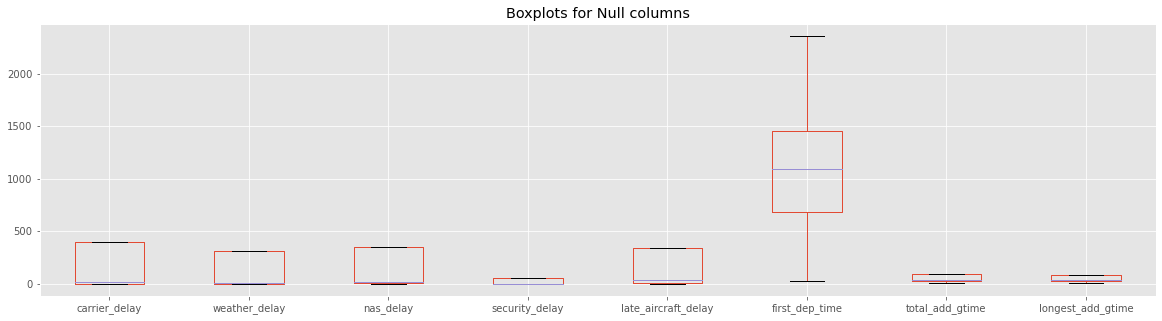

In [14]:
col = ['carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'first_dep_time',
       'total_add_gtime', 'longest_add_gtime']
df_null.describe().boxplot(column=col , showfliers=False)
plt.title('Boxplots for Null columns');

In [15]:
df_null.columns

Index(['cancellation_code', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'first_dep_time',
       'total_add_gtime', 'longest_add_gtime', 'no_name', 'fl_date',
       'arr_delay', 'month', 'week', 'day', 'arr_delay_bool'],
      dtype='object')

In [16]:
def null_explore(column):
    return df[column].value_counts()

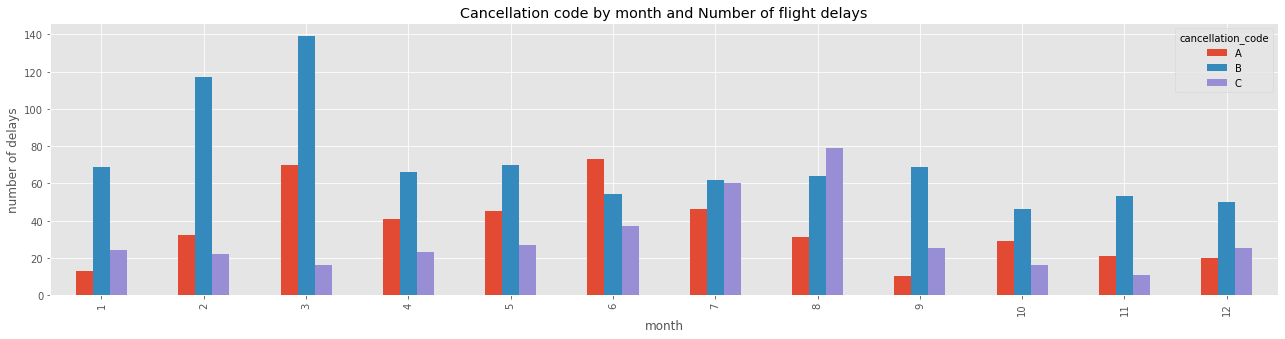

In [17]:
df_null.groupby(by=['month', 'cancellation_code'])['arr_delay_bool'].count().unstack().plot.bar(figsize=(22,5))
plt.title('Cancellation code by month and Number of flight delays');
plt.ylabel('number of delays');

In [18]:
df_null

cancellation_code  carrier_delay  weather_delay  nas_delay  \
0                   NaN            6.0            0.0       10.0   
1                   NaN            NaN            NaN        NaN   
2                   NaN            NaN            NaN        NaN   
3                   NaN            NaN            NaN        NaN   
4                   NaN            NaN            NaN        NaN   
...                 ...            ...            ...        ...   
99991                 B            NaN            NaN        NaN   
99992               NaN           15.0            0.0        0.0   
99993               NaN            0.0            0.0       24.0   
99994               NaN            NaN            NaN        NaN   
99995               NaN            NaN            NaN        NaN   

       security_delay  late_aircraft_delay  first_dep_time  total_add_gtime  \
0                 0.0                  6.0             NaN              NaN   
1                 NaN                  NaN             NaN              NaN   
2                 NaN                  NaN             NaN              NaN   
3                 NaN                  NaN             NaN              NaN   
4                 NaN                  NaN             NaN              NaN   
...               ...                  ...             ...              ...   
99991             NaN                  NaN             NaN              NaN   
99992             0.0                 56.0             NaN              NaN   
99993             0.0                 32.0             NaN              NaN   
99994             NaN                  NaN             NaN              NaN   
99995             NaN                  NaN             NaN              NaN   

       longest_add_gtime  no_name    fl_date  arr_delay  month  week  day  \
0                    NaN      NaN 2019-05-22       22.0      5    21  142   
1                    NaN      NaN 2018-08-28       -5.0      8    35  240   
2                    NaN      NaN 2018-01-14        5.0      1     2   14   
3                    NaN      NaN 2018-02-20      -20.0      2     8   51   
4                    NaN      NaN 2019-06-07       -7.0      6    23  158   
...                  ...      ...        ...        ...    ...   ...  ...   
99991                NaN      NaN 2018-07-24        0.0      7    30  205   
99992                NaN      NaN 2019-02-04       71.0      2     6   35   
99993                NaN      NaN 2019-11-21       56.0     11    47  325   
99994                NaN      NaN 2018-10-16        0.0     10    42  289   
99995                NaN      NaN 2018-03-07      -17.0      3    10   66   

       arr_delay_bool  
0                True  
1               False  
2                True  
3               False  
4               False  
...               ...  
99991           False  
99992            True  
99993            True  
99994           False  
99995           False  

[99996 rows x 16 columns]

In [19]:
delay_list = ['carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']

In [20]:
def analyze_null(period, col):
    scaler = StandardScaler()
    int_delay_num = pd.DataFrame(df_null.groupby(by=period)[col].agg(lambda x: (x > 0).sum()))
    int_delay_num = scaler.fit_transform(int_delay_num)

    scaler2 = StandardScaler()
    delay_total_num = pd.DataFrame(df_null.groupby(by=period)['arr_delay_bool'].sum())
    delay_total_num = scaler2.fit_transform(delay_total_num)

    scaler3 = StandardScaler()
    flight_per_period = pd.DataFrame(df_null.groupby(by=period)['fl_date'].count())
    flight_per_period = scaler3.fit_transform(flight_per_period)

    plt.plot(int_delay_num, label=f' Number of {col} delays by {period}')
    plt.plot(delay_total_num, label=f'total num of delay per {period}')
    plt.plot(flight_per_period, label=f'flights per period')
    
    plt.xlabel(f'{period}')
    
    plt.title(f'{col} analysis by{period}')
    plt.legend()

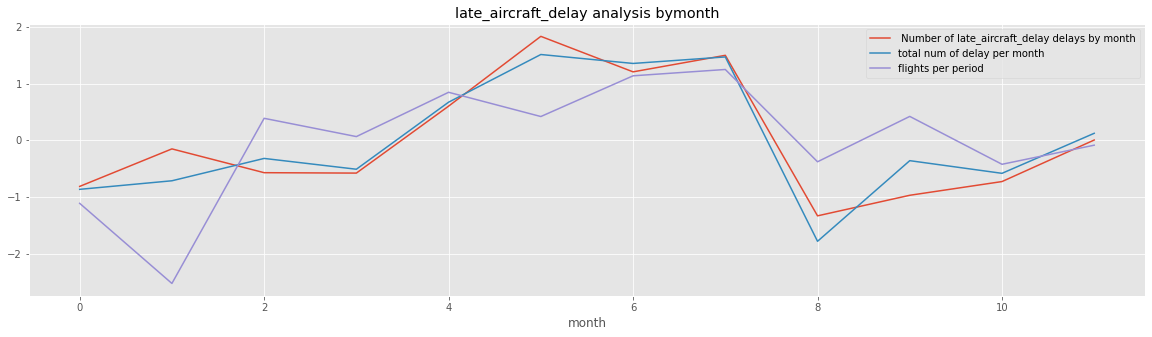

In [21]:
analyze_null('month', 'late_aircraft_delay')

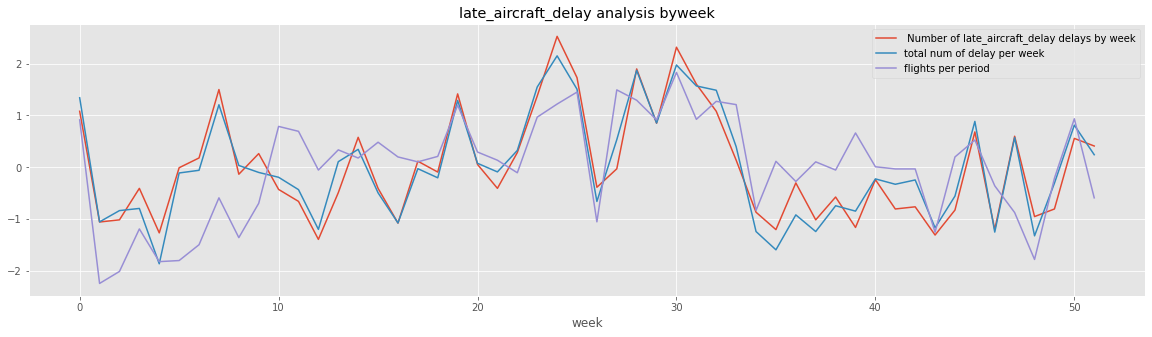

In [22]:
analyze_null('week', 'late_aircraft_delay')

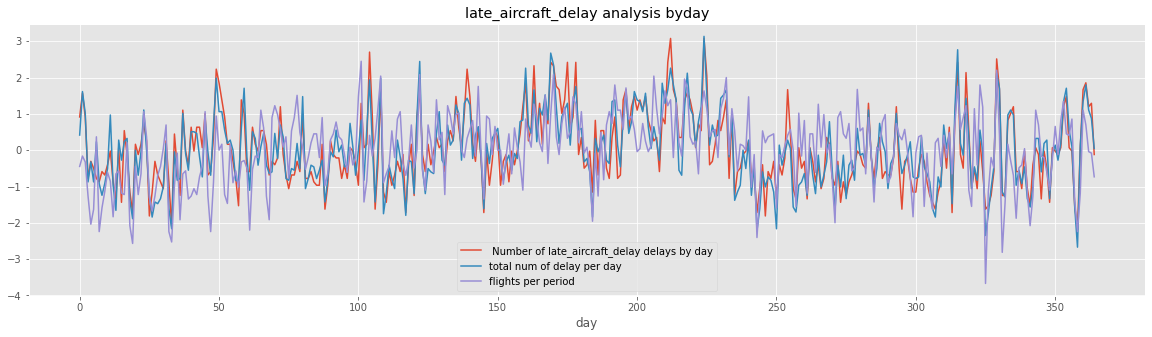

In [23]:
analyze_null('day', 'late_aircraft_delay')

## Cancellation code
Seems to have some prediction power, particularly code B udring the early and late months tends to correlate with more delays 
- However, the meaning of the codes is not actually known by me so interpretability is lost
- this project is concerned with predicting delays, and using cancellations as a predictor seems wrong at the moment

## Null delays
These coluns seem highly correlated with the number of arrival delays
- However, since over 80% of the values are missing:
    - At this point, any sort of average (mean, median, mode) would lose any meaning
- Imputing the missing values with zeros could make sense, as one could interpret missing entries as the flight not being delayed
    - Howver the entries would still be very sparse, and would be no different than indicators of the time of the flights

# Flight Distance Analysis

In [24]:
df['distance_bins'] = pd.cut(df['distance'], 100)

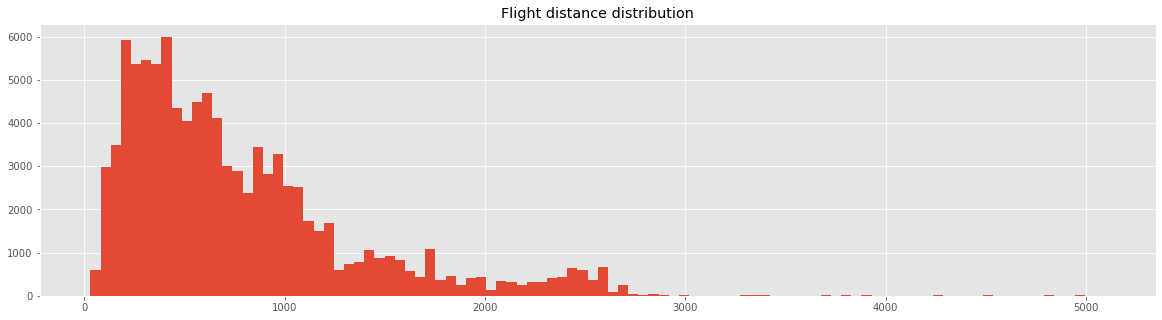

In [25]:
plt.hist(df['distance'], bins=100)
plt.title('Flight distance distribution');

In [26]:
plt.plot(df.groupby(by='distance_bins')['delay_bool'].sum().values, label='Number of delays per distance bin')
plt.plot(df.groupby(by='distance_bins')['delay_bool'].count().values, label='Number of flights per distance bin')
plt.title('Fligth Distance and Flight Traffic')
plt.legend();

KeyError: 'Column not found: delay_bool'

<ipython-input-71-468ee6e3a65d>:9: RuntimeWarning: invalid value encountered in true_divide
  z = df.groupby(by='distance_bins')['delay_bool'].sum().values / df.groupby(by='distance_bins')['delay_bool'].count().values


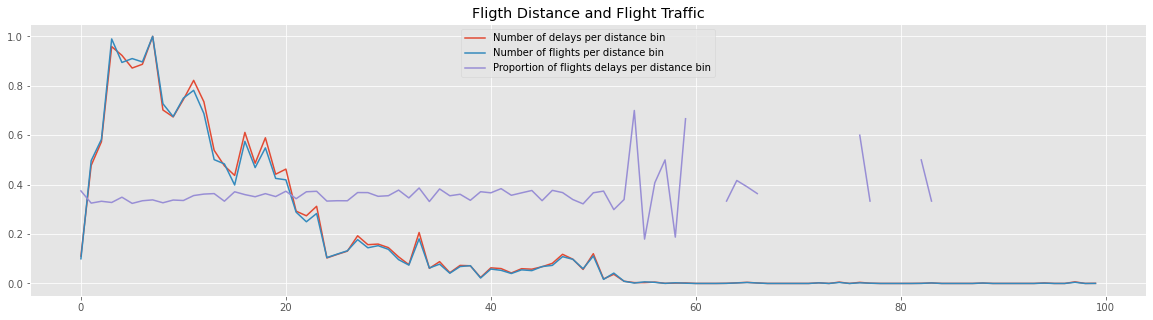

In [71]:
scale = MinMaxScaler()
x = pd.DataFrame(df.groupby(by='distance_bins')['delay_bool'].sum())
x = scale.fit_transform(x)

scale2 = MinMaxScaler()
y = pd.DataFrame(df.groupby(by='distance_bins')['delay_bool'].count())
y = scale2.fit_transform(y)

z = df.groupby(by='distance_bins')['delay_bool'].sum().values / df.groupby(by='distance_bins')['delay_bool'].count().values

plt.plot(x, label='Number of delays per distance bin')
plt.plot(y, label='Number of flights per distance bin')
plt.plot(z, label='Proportion of flights delays per distance bin')
plt.title('Fligth Distance and Flight Traffic')
plt.legend();

## Flight Distance Analysis: conclusion
- shorter flights have more delays than longer delays
- when when flight traffic is taken into account
    - the cnnection between delays and distance disapears
        - shorter flights experience more delays because shorter flights are more common
        - flight that have very large distances have sporiadic proportions of flight delays
            - this is probablt due to the fact that they are so rare

---
# Departure Delay Temporal Analysis

In [102]:
df['month'] =  df.fl_date.dt.month

In [103]:
df['week'] = df.fl_date.dt.isocalendar().week

In [104]:
df['day'] = df.fl_date.dt.day_of_year

In [105]:
df['day_of_week'] = df.fl_date.dt.dayofweek

In [106]:
df['hour'] = pd.cut(df['dep_time'], bins=24)

In [107]:
df['delay_bool'] = df['dep_delay'] > 0

In [111]:
def analyze_period(period):
    scaler = StandardScaler()
    x = pd.DataFrame(df.groupby(by=period)['fl_date'].count())
    x = scaler.fit_transform(x)
    x = x.reshape(-1,)
    scaler2 = StandardScaler()
    y = pd.DataFrame(df.groupby(by=period)['dep_delay'].mean())
    y = scaler2.fit_transform(y)
    y = y.reshape(-1,)

    display(pd.DataFrame(np.corrcoef(x, y)))
    
    plt.plot(x, label=f'flight by {period}')
    plt.plot(y, label=f'average departure delays by {period}')
    
    
    plt.xlabel(f'{period}')
    plt.title(f'Average Departure Delay By {period}')
    plt.legend()

0         1
0  1.000000  0.207564
1  0.207564  1.000000

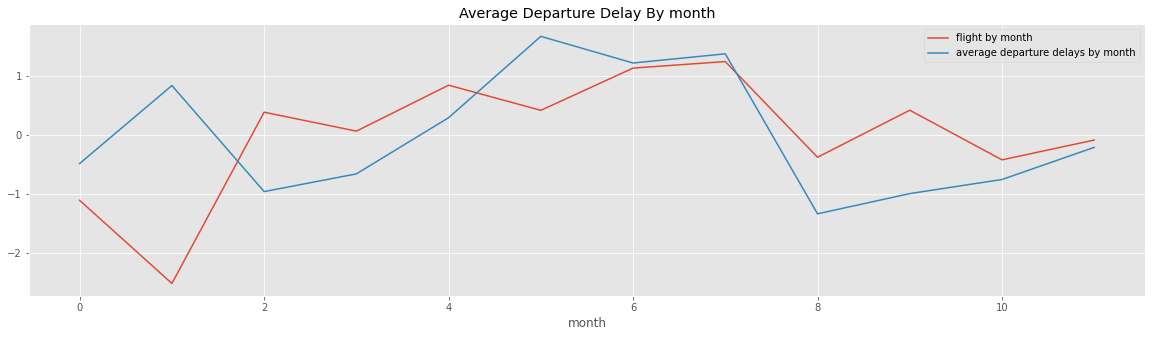

In [112]:
analyze_period('month')

0         1
0  1.000000  0.398734
1  0.398734  1.000000

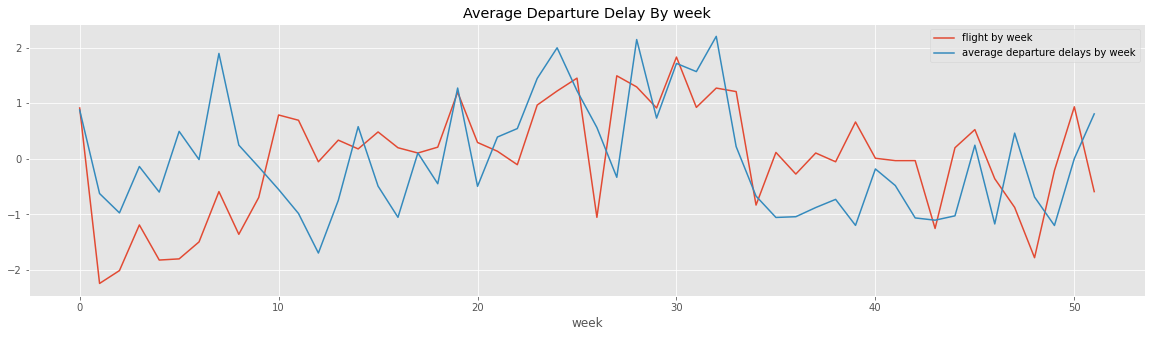

In [113]:
analyze_period('week')

0         1
0  1.000000  0.222075
1  0.222075  1.000000

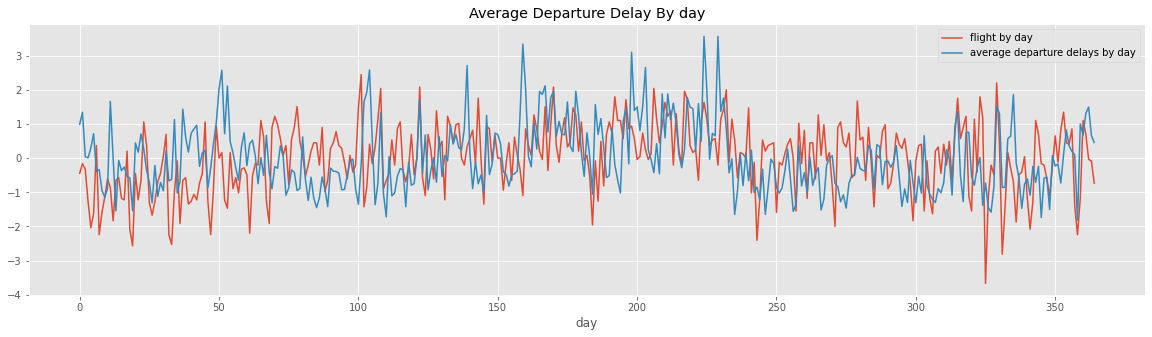

In [114]:
analyze_period('day')

0         1
0  1.000000  0.585929
1  0.585929  1.000000

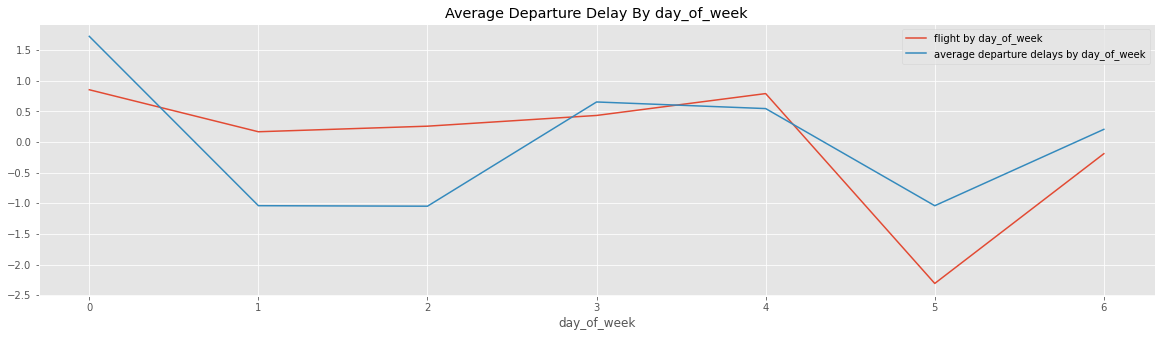

In [115]:
analyze_period('day_of_week')

In [119]:
def analyze_period2(period):
    scaler = StandardScaler()
    x = pd.DataFrame(df.groupby(by=period)['fl_date'].count())
    x = scaler.fit_transform(x)
    x = x.reshape(-1,)
    scaler2 = StandardScaler()
    y = pd.DataFrame(df.groupby(by=period)['delay_bool'].sum())
    y = scaler2.fit_transform(y)
    y = y.reshape(-1,)

    display(pd.DataFrame(np.corrcoef(x, y)))

    
    plt.plot(x, label= f'flights per {period}')
    plt.plot(y, label=f'number of delays per {period}')
    
    plt.xlabel(f'{period}')
    plt.title(f'Number of Departure Delays by {period}')
    plt.legend();

0         1
0  1.000000  0.646839
1  0.646839  1.000000

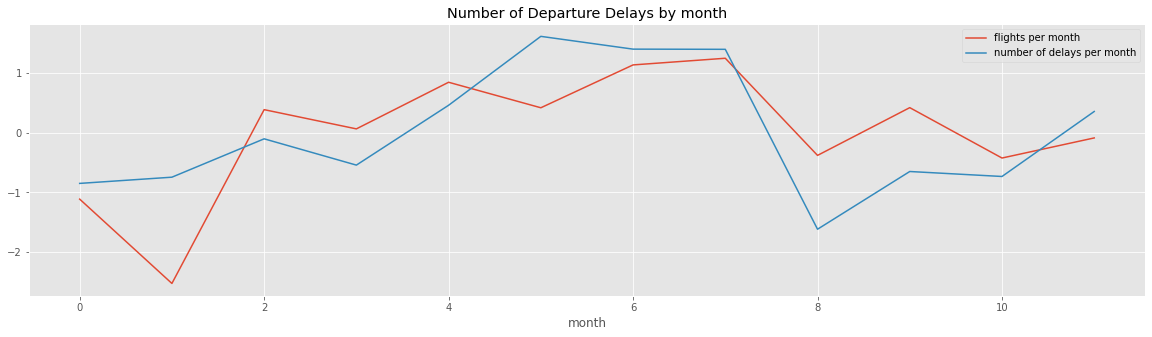

In [120]:
analyze_period2('month')

0         1
0  1.000000  0.677084
1  0.677084  1.000000

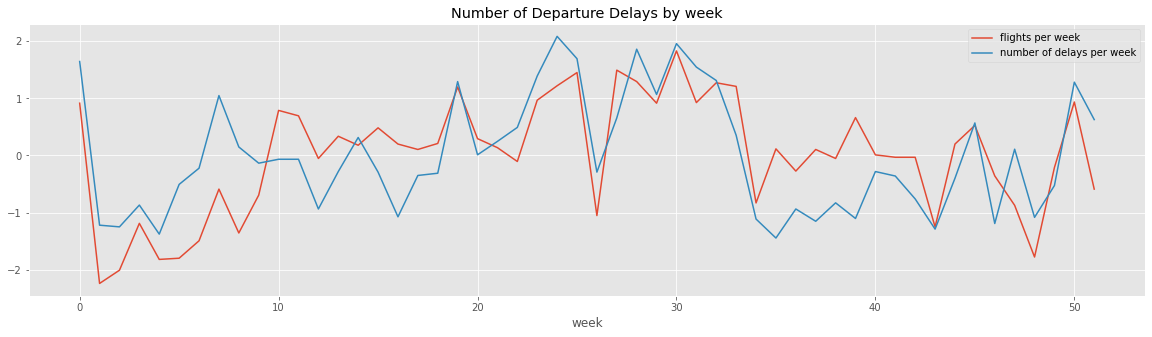

In [121]:
analyze_period2('week')

0         1
0  1.000000  0.599381
1  0.599381  1.000000

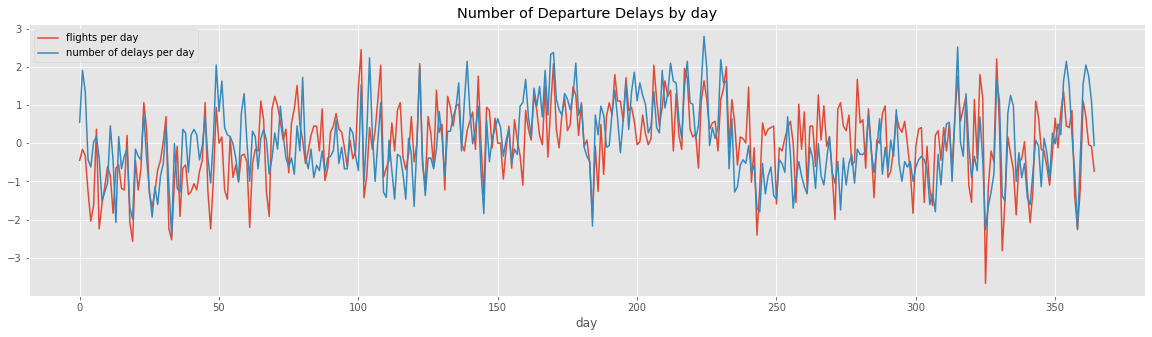

In [122]:
analyze_period2('day')

0         1
0  1.000000  0.926321
1  0.926321  1.000000

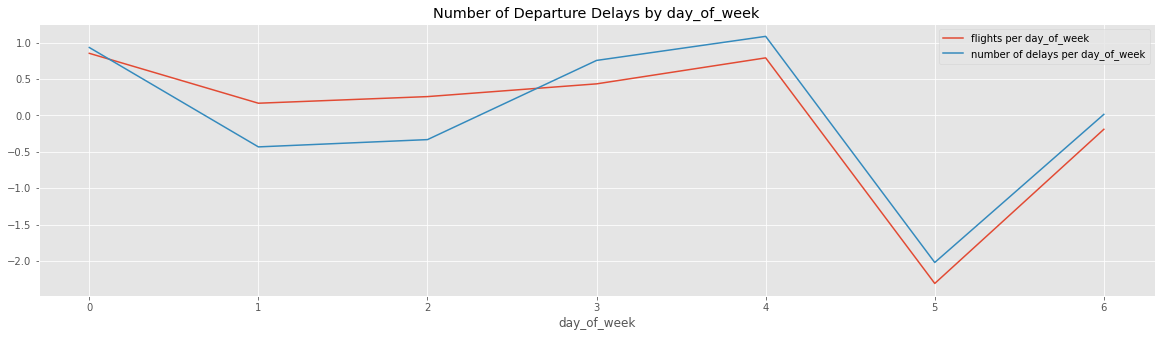

In [123]:
analyze_period2('day_of_week')

In [129]:
def analyze_period3(period):
    scaler = MinMaxScaler()
    x = pd.DataFrame(df.groupby(by=period)['fl_date'].count())
    x = scaler.fit_transform(x)
    x = x.reshape(-1,)

    scaler2 = MinMaxScaler()
    y = pd.DataFrame((df.groupby(by=period)['delay_bool'].sum() / df.groupby(by=period)['delay_bool'].count())).values
    y = y.reshape(-1,)

    display(pd.DataFrame((np.corrcoef(x, y))))


    plt.plot(x, label= f'flights per {period}')
    plt.plot(y, label=f'proportion of delays per {period}')

    plt.title(f'Flights Per {period} and Departure Delays Per {period}')
    plt.xlabel(f'{period}')
    plt.legend()

0         1
0  1.000000  0.189601
1  0.189601  1.000000

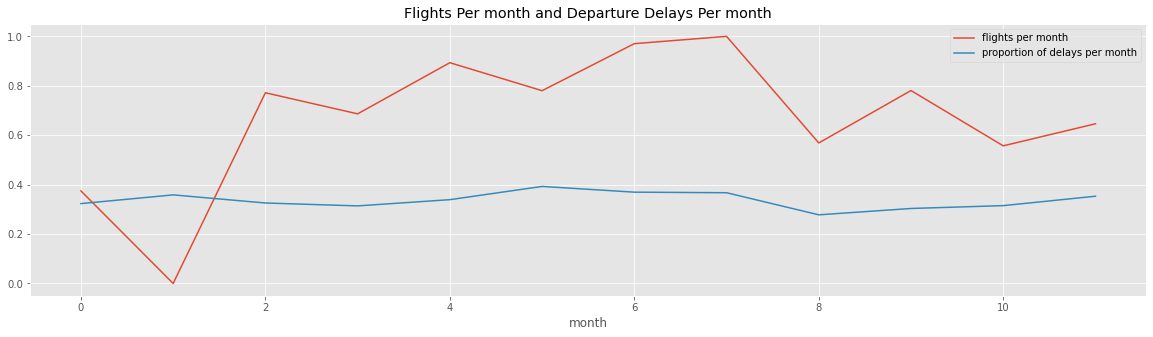

In [130]:
analyze_period3('month')

0         1
0  1.000000  0.442217
1  0.442217  1.000000

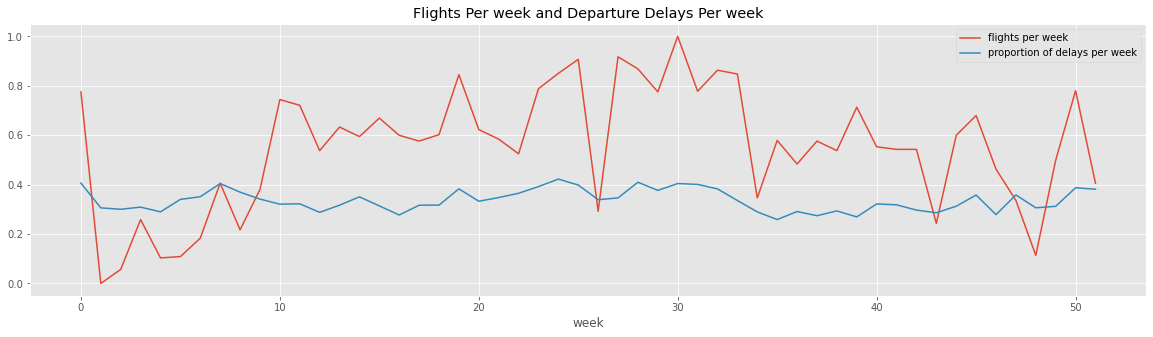

In [131]:
analyze_period3('week')

0         1
0  1.000000  0.271103
1  0.271103  1.000000

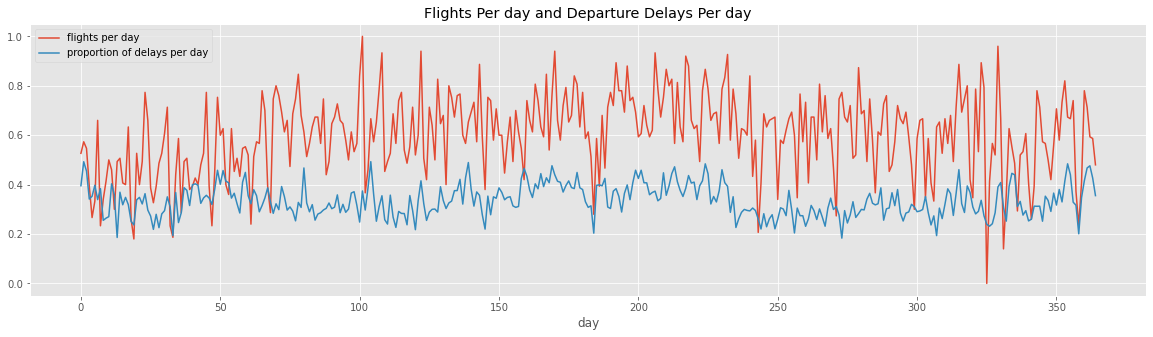

In [132]:
analyze_period3('day')

0         1
0  1.000000  0.693458
1  0.693458  1.000000

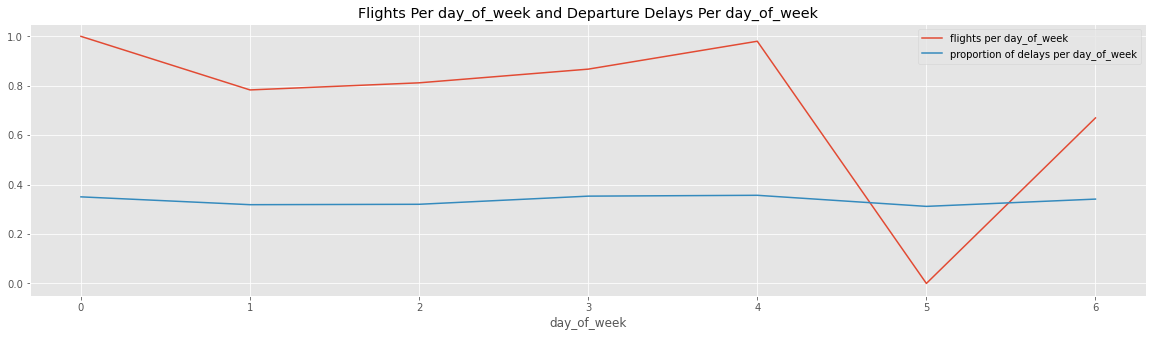

In [133]:
analyze_period3('day_of_week') 

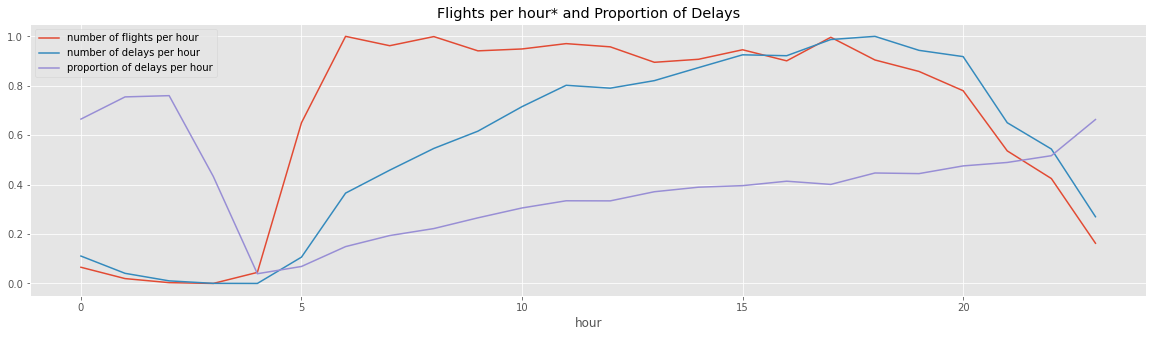

In [134]:
scale = MinMaxScaler() 
x = pd.DataFrame(pd.cut(df['dep_time'], bins=24).value_counts().sort_index())
x = scale.fit_transform(x).reshape(-1,)
plt.plot(x, label='number of flights per hour')
x2 = pd.DataFrame(pd.cut(df['dep_time'], bins=24).value_counts().sort_index()).values

scale2 = MinMaxScaler()
y = pd.DataFrame(df.groupby(by='hour')['delay_bool'].sum())
y = scale2.fit_transform(y).reshape(-1,)
plt.plot(y , label='number of delays per hour')
y2 = pd.DataFrame(df.groupby(by='hour')['delay_bool'].sum()).values

z = y2 / x2
plt.plot(z, label='proportion of delays per hour')

plt.title('Flights per hour* and Proportion of Delays')
plt.xlabel('hour')
plt.legend()
plt.show()

## Departure Delay Temporal Analysis: conclusions
1. Arrival delay times
- For any given time period, the mean arrival delay is closely related to the number of flights occuring in that time
2. Number of arrival delays
- For any given time period, the number of arrival delays is closely related to the number of flights occuring in that time
    - However, when the number of flights is taken into acocunt, the proportion of flight delays is unrelated to the: 
        - month 
        - week
        - day
        - day of the week
    - The time of day, given in 24 approximate divisions of hours, does seem to have some predictive powers
        - when the number of flight is taken into account, the proportion of delays does differ amoung hours
            - The earlier hours (0-3) have high delay times, followed by a steep decline to the (5th) hour and then a steady climb for the rest of the day 
            - An expert on this topic may be able to explain why

# Analysis of Categorical Variables of Interest
1. airline company
2. destination and origin airports

In [48]:
df_cat = df[['mkt_carrier', 'origin', 'dest', 'arr_delay', 'fl_date']].copy(deep=True)
df_cat['arr_delay'] = df_cat['arr_delay'] > 0
df_cat['month'] = df_cat.fl_date.dt.month
df_cat

mkt_carrier origin dest  arr_delay    fl_date  month
0              AA    DTW  DFW       True 2019-05-22      5
1              AA    CLT  BWI      False 2018-08-28      8
2              AA    DFW  COS       True 2018-01-14      1
3              AA    DFW  LAX      False 2018-02-20      2
4              AA    ORD  SEA      False 2019-06-07      6
...           ...    ...  ...        ...        ...    ...
99991          WN    BWI  BDL      False 2018-07-24      7
99992          WN    SEA  DEN       True 2019-02-04      2
99993          WN    ONT  PHX       True 2019-11-21     11
99994          WN    STL  ICT      False 2018-10-16     10
99995          WN    MDW  PHX      False 2018-03-07      3

[99996 rows x 6 columns]

In [49]:
df_cat.groupby(by=['mkt_carrier'])['fl_date'].count()

mkt_carrier
AA    25986
AS     5360
B6     3757
DL    21893
F9     1650
G4     1218
HA     1153
NK     2405
UA    19419
VX      116
WN    17039
Name: fl_date, dtype: int64

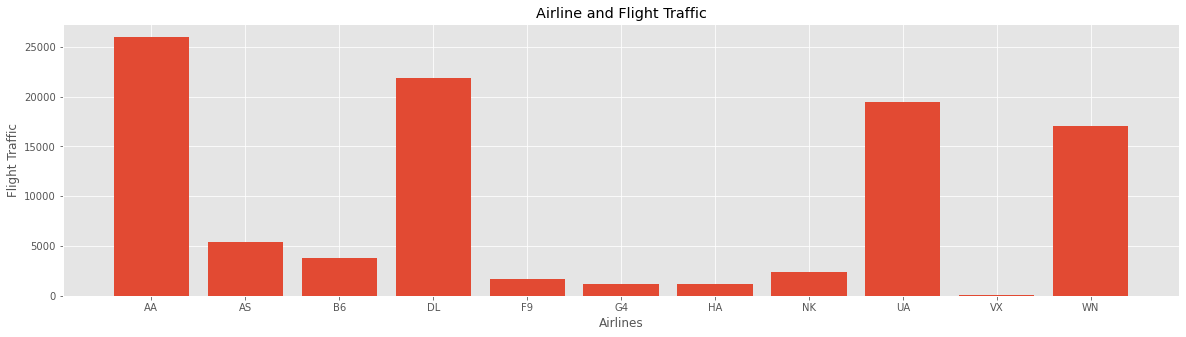

In [50]:
plt.bar(x=df_cat.groupby(by=['mkt_carrier'])['fl_date'].count().index, height=df_cat.groupby(by=['mkt_carrier'])['fl_date'].count().values)
plt.xlabel('Airlines')
plt.ylabel('Flight Traffic')
plt.title('Airline and Flight Traffic');

In [51]:
df_cat.groupby(by=['mkt_carrier'])['arr_delay'].sum()

mkt_carrier
AA    9399
AS    1860
B6    1478
DL    6387
F9     667
G4     453
HA     398
NK     799
UA    6997
VX      49
WN    6174
Name: arr_delay, dtype: int64

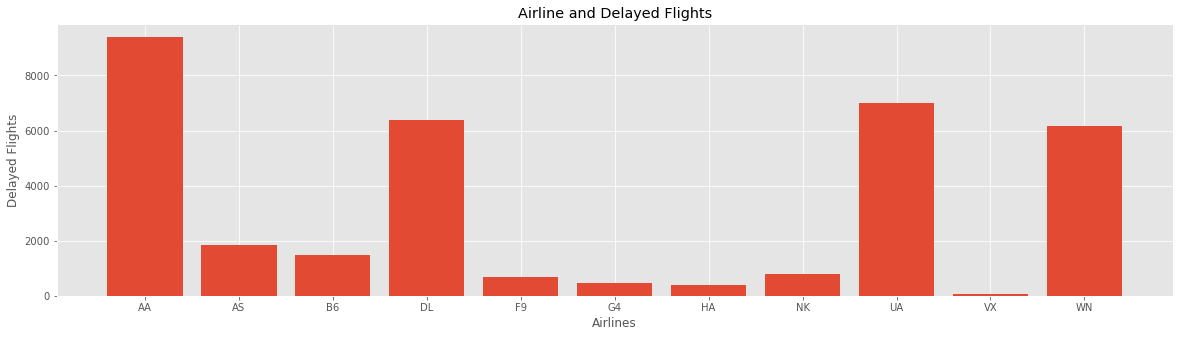

In [52]:
plt.bar(x=df_cat.groupby(by=['mkt_carrier'])['arr_delay'].sum().index, height=df_cat.groupby(by=['mkt_carrier'])['arr_delay'].sum().values)
plt.xlabel('Airlines')
plt.ylabel('Delayed Flights')
plt.title('Airline and Delayed Flights');

In [53]:
df_cat.groupby(by=['origin'])['fl_date'].count().sort_values(ascending=False)[:15]

origin
ORD    4960
ATL    4885
DFW    3747
DEN    3531
CLT    3239
LAX    3071
DTW    2311
SEA    2284
SFO    2234
IAH    2233
PHX    2147
LAS    2097
LGA    2082
MSP    2046
EWR    2028
Name: fl_date, dtype: int64

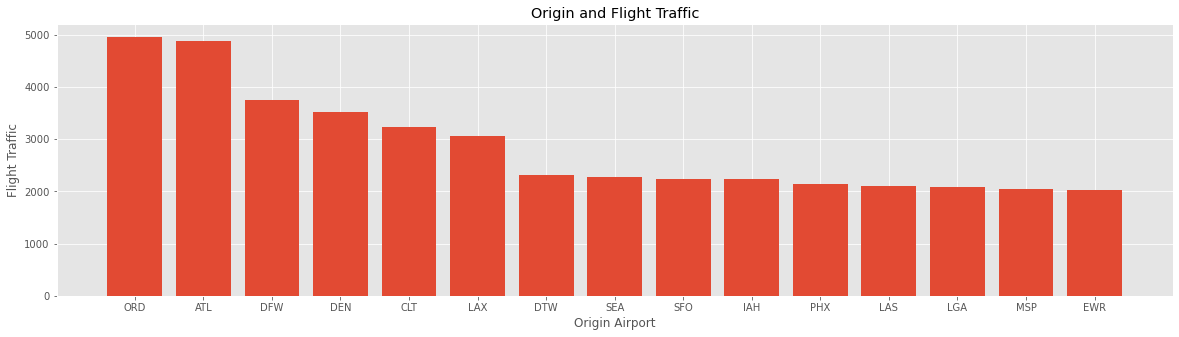

In [54]:
plt.bar(x=df_cat.groupby(by=['origin'])['fl_date'].count().sort_values(ascending=False)[:15].index, height=df_cat.groupby(by=['origin'])['fl_date'].count().sort_values(ascending=False)[:15].values)
plt.xlabel('Origin Airport')
plt.ylabel('Flight Traffic')
plt.title('Origin and Flight Traffic');

In [55]:
df_cat.groupby(by=['dest'])['fl_date'].count().sort_values(ascending=False)[:15]

dest
ORD    4937
ATL    4923
DFW    3707
DEN    3452
CLT    3212
LAX    3101
SEA    2350
SFO    2297
DTW    2218
PHX    2189
IAH    2179
LGA    2104
MSP    2087
LAS    2052
EWR    1975
Name: fl_date, dtype: int64

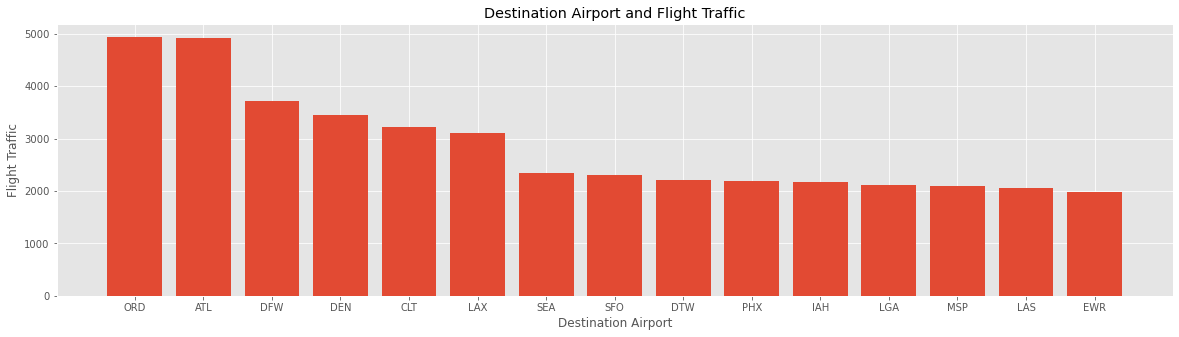

In [56]:
plt.bar(x=df_cat.groupby(by=['dest'])['fl_date'].count().sort_values(ascending=False)[:15].index, height=df_cat.groupby(by=['dest'])['fl_date'].count().sort_values(ascending=False)[:15].values)
plt.xlabel('Destination Airport')
plt.ylabel('Flight Traffic')
plt.title('Destination Airport and Flight Traffic');

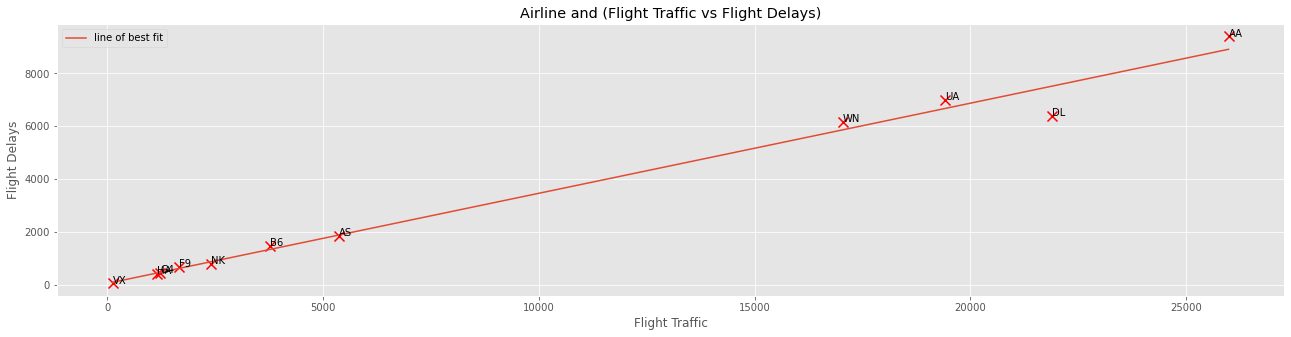

In [57]:
x = df_cat.groupby(by=['mkt_carrier'])['fl_date'].count().values
y = df_cat.groupby(by=['mkt_carrier'])['arr_delay'].sum().values
airlines = df_cat.groupby(by=['mkt_carrier'])['arr_delay'].sum().index.values


plt.figure(figsize=(22,5))
plt.scatter(x=x, y=y, marker='x',s=100, c='red')

for i, txt in enumerate(airlines):
    plt.annotate(txt, (x[i], y[i]))

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), label='line of best fit')


plt.xlabel('Flight Traffic')
plt.ylabel('Flight Delays')
plt.title('Airline and (Flight Traffic vs Flight Delays)')
plt.legend();

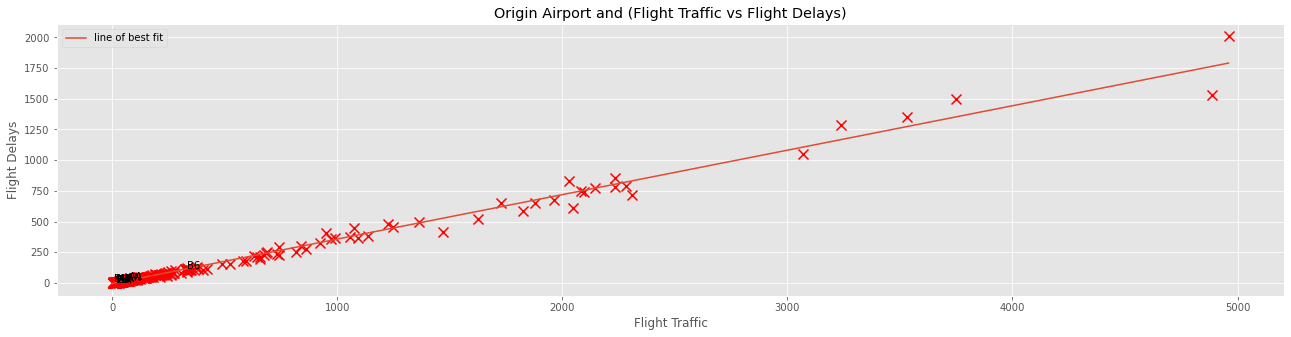

In [58]:
x = df_cat.groupby(by=['origin'])['fl_date'].count().values
y = df_cat.groupby(by=['origin'])['arr_delay'].sum().values
airlines = df_cat.groupby(by=['mkt_carrier'])['arr_delay'].sum().index.values


plt.figure(figsize=(22,5))
plt.scatter(x=x, y=y, marker='x',s=100, c='red')

for i, txt in enumerate(airlines):
    plt.annotate(txt, (x[i], y[i]))

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), label='line of best fit')

plt.xlabel('Flight Traffic')
plt.ylabel('Flight Delays')
plt.title('Origin Airport and (Flight Traffic vs Flight Delays)')
plt.legend();

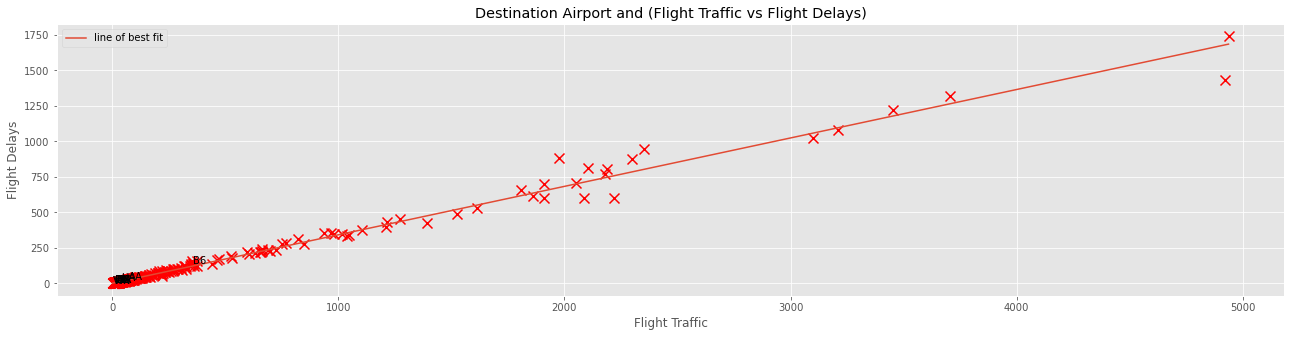

In [59]:
x = df_cat.groupby(by=['dest'])['fl_date'].count().values
y = df_cat.groupby(by=['dest'])['arr_delay'].sum().values
airlines = df_cat.groupby(by=['mkt_carrier'])['arr_delay'].sum().index.values


plt.figure(figsize=(22,5))
plt.scatter(x=x, y=y, marker='x',s=100, c='red')

for i, txt in enumerate(airlines):
    plt.annotate(txt, (x[i], y[i]))

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), label='line of best fit')

plt.xlabel('Flight Traffic')
plt.ylabel('Flight Delays')
plt.title('Destination Airport and (Flight Traffic vs Flight Delays)')
plt.legend();

## Analysis of Categorical Variables of Interest: conclusions
Upon initial inspection, the number of delays seemd to be affect by the:
- airport origin
- airport dest
- airline

However, when considering the flight traffic with respect to each of these categories:
- Their predictive power disapears

---
# Final conlusions:

Although the average flight delay is positive the mean flight delay is negative. Thus most flights are expected to not be delayed, but actually slightly early. The distribution of delay times is skewed with several few extreme cases, which pushes the acerage to be higher than the mean. 

The largest predictor of flight delays from this dataset is the amount of flight traffic that occurs.
- the month, week, day, week of day, seem to hold no information about the likelyhood of a delay outside of the information they  hold about the flight traffic
    - busier times can expect more delays, because they have more flights, but proportionally expect the same frequency of ddelays as slower times
- the categorical variables. (airline, origin airports, destination airports) hold no predicitve power for flight delays outside of their implicit information for traffic
    - busier airports can expect more delays, because they have more flights, but proportionally expect the same frequency of ddelays as smaller airports
- shorter flights seems to have more delays, similarily this seems to be because they are more frequent than longer flights
The hour of the flight seems to have some predictive properties for flight delays that does not completely depend on the traffic
